In [1]:
# Load libraries
import pandas as pd #
from scipy.signal import butter, filtfilt
from scipy.stats import skew
import numpy as np
from datetime import datetime
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize
from sklearn.ensemble import RandomForestClassifier
import time
import sys
import scipy.io as sio
import pickle, json
import matplotlib.pyplot as plt

In [4]:
sub = 'C'
subject = 'Sub%s_14chan_3LRR' % sub

In [5]:
filename = 'results_roc_SVM_%s.pkl' % sub
SVM_results_roc = pickle.load(open(filename, 'rb'))

filename = 'results_pr_SVM_%s.pkl' % sub
SVM_results_pr = pickle.load(open(filename, 'rb'))

IOError: [Errno 2] No such file or directory: 'results_roc_SVM_C.pkl'

In [ ]:
filename = 'results_roc_RF_%s.pkl' % sub
RF_results_roc = pickle.load(open(filename, 'rb'))

filename = 'results_pr_RF_%s.pkl' % sub
RF_results_pr = pickle.load(open(filename, 'rb'))

# ROC 

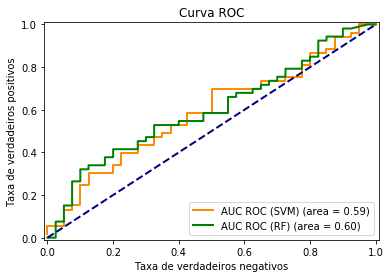

In [6]:
import matplotlib.pyplot as plt
fig = plt.figure()

RF_label = 'AUC ROC (RF) (area = %0.2f)' % RF_results_roc['RF_roc_auc']
SVM_label = 'AUC ROC (SVM) (area = %0.2f)' % SVM_results_roc['SVM_roc_auc']
plt.plot(SVM_results_roc['SVM_fpr'], SVM_results_roc['SVM_tpr'], color = 'darkorange', lw = 2, label = SVM_label) 
plt.plot(RF_results_roc['RF_fpr'], RF_results_roc['RF_tpr'], color = 'green', lw = 2, label = RF_label)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('Taxa de verdadeiros negativos')
plt.ylabel('Taxa de verdadeiros positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

fig.savefig('ROC-sub%s-comparison-balanceadas.png' % sub)

# PR

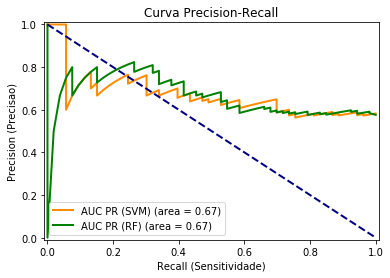

In [7]:
fig = plt.figure()

RF_label = 'AUC PR (RF) (area = %0.2f)' % RF_results_pr['RF_auc_PR']
SVM_label = 'AUC PR (SVM) (area = %0.2f)' % SVM_results_pr['SVM_auc_PR']
plt.plot(SVM_results_pr['SVM_recall'], SVM_results_pr['SVM_precision'], color = 'darkorange', lw = 2, label = SVM_label) 
plt.plot(RF_results_pr['RF_recall'], RF_results_pr['RF_precision'], color = 'green', lw = 2, label = RF_label)
plt.plot([0, 1], [1, 0], color='navy', lw=2, linestyle='--')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('Recall (Sensitividade)')
plt.ylabel('Precision (Precisao)')
plt.title('Curva Precision-Recall')
plt.legend(loc="lower left")
plt.show()

fig.savefig('PR-sub%s-comparison-balanceadas.png' % sub)